# Support Vector Machine (SVM) Algorithm

Rafiq Islam  
2024-11-05

## Introduction

Support Vector Machines (SVM) is a powerful non-parametric supervised
machine learning algorithm used for classification and, less commonly,
regression tasks. Support Vector Machines are designed to find an
optimal hyperplane that best separates data points into classes. The key
idea behind SVMs is to maximize the margin between data points of
different classes while minimizing classification errors. This leads to
a robust decision boundary that generalizes well to unseen data.

## The Mathematical Foundation of SVM

Consider a classification problem. Given a dataset $(\mathbf{x}_i, y_i)$
where $i = 1, 2, \dots, N$, $x_i\in \mathbb{R}^d$ represents the feature
vector of the $i$-th sample, and $y_i \in \{-1, 1\}$ represents the
class label. The goal of SVM is to find a hyperplane that maximally
separates the classes.

### Hyperplane and Dicision Boundary

Definition (Hyperplane)  
A hyperplane in an $n$-dimensional space is defined by: $$
w^T \mathbf{x} + b = 0
$$

where:

-   $w$ is the weight vector,
-   $b$ is the bias term,
-   $x$ is any point on the hyperplane.

For a two-dimensional space, this hyperplane is simply a line. $$
w^T\mathbf{x}+b=0;\hspace{4mm}\implies w_0x+w_1y+b=0;\hspace{4mm}\implies y=\frac{-w_0x-b}{w_1}
$$

and for a three-dimensional space, this hyperplane is simply a 2D plane

$$
w^T\mathbf{x}+b=0;\hspace{4mm}\implies w_0x+w_1y+w_2z+b=0;\hspace{4mm}\implies z=\frac{-w_0x-w_1y-b}{w_2}
$$

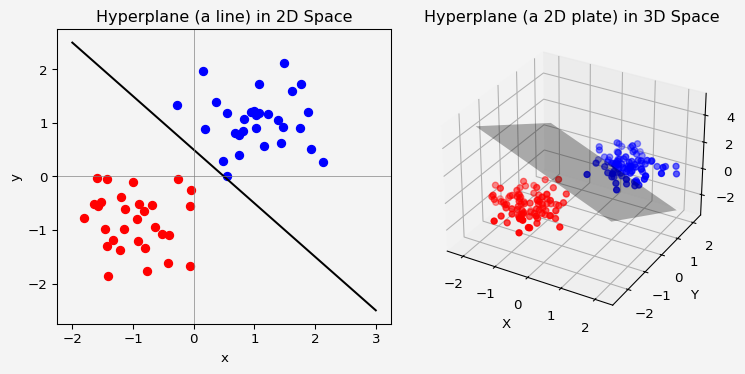

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w_2d = np.array([1,1])
b_2d = -0.5

w_3d = np.array([1,1,1])
b_3d = -1

def decision_boundary_2d(x):
    return (-w_2d[0]*x-b_2d) / w_2d[1]

def decision_boundary_3d(x, y):
    return (-w_3d[0]*x-w_3d[1]*y-b_3d) / w_3d[2]

np.random.seed(0)
class1x_2d = np.random.normal(loc=[1,1],scale=0.5, size=(30,2))
class2x_2d = np.random.normal(loc=[-1,-1],scale=0.5, size=(30,2))

class1x_3d = np.random.normal(loc=[1,1,1],scale=0.5, size=(90,3))
class2x_3d = np.random.normal(loc=[-1,-1,-1],scale=0.5, size=(90,3))

fig = plt.figure( figsize=(7.9,4))
ax1 = fig.add_subplot(121)
x_vals_2d = np.linspace(-2,3,100)
plt.plot(
    x_vals_2d, decision_boundary_2d(x_vals_2d),
    'k-', label = "Decision Boundary (Hyperplane)"
    )
ax1.scatter(
    class1x_2d[:,0], class1x_2d[:,1], color='blue',
    marker='o', label = 'Class +1'
    )
ax1.scatter(
    class2x_2d[:,0], class2x_2d[:,1], color='red',
    marker='o', label = 'Class -1'
    )
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Hyperplane (a line) in 2D Space')
ax1.axhline(0, color='grey', lw = 0.5)
ax1.axvline(0, color='grey', lw = 0.5)


ax2 = fig.add_subplot(122, projection = '3d')
x_vals_3d = np.linspace(-2,2,30)
y_vals_3d = np.linspace(-2,2,30)
X, Y = np.meshgrid(x_vals_3d, y_vals_3d)
Z = decision_boundary_3d(X, Y)

ax2.plot_surface(X, Y, Z, color='k', alpha = 0.3, rstride=100, cstride=100, edgecolor='none')
ax2.scatter(class1x_3d[:,0], class1x_3d[:,1],class1x_3d[:,2], color = 'blue', marker='o', label='Class +1')
ax2.scatter(class2x_3d[:,0], class2x_3d[:,1],class2x_3d[:,2], color = 'red', marker='o', label='Class -1')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Hyperplane (a 2D plate) in 3D Space')

plt.tight_layout()
axes = [ax1,ax2]
for ax in axes:
    ax.set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

### Margin and the Optimal Hyperplane

Definition (Margin)  
The margin is the distance between the hyperplane and the nearest data
points from either class. SVM aims to maximize this margin to achieve
better separation, which makes the classifier more robust.

To define the margin mathematically, we impose that for all points: $$
y_i (w^T \mathbf{x}_i + b) \geq 1 \quad \forall i
$$

For a data vector $\mathbf{x}_i$ with label $y_i$:

-   If $y_i = +1$: we want $w^T \mathbf{x}_i + b\ge 1$ (to be on the
    correct side of the hyperplane)  
-   If $y_i = -1$: we want $w^T \mathbf{x}_i + b\le 1$ (to be on the
    correct side of the hyperplane)

These two conditions combaine the equation mention above. That is all
points must be at least a unit distance from the hyperplane on the
correct side. The data points that satisfy $y_i (w^T x_i + b) = 1$ or
$y_i (w^T x_i + b) = -1$ lie on the “support vectors,” or the points
closest to the hyperplane.

We know from the elementary geometry that the distance between two
parallel lines $ax+by+c_1=0$ and $ax+by+c_2=0$ is given by

$$
\frac{|c_1-c_2|}{\sqrt{a^2+b^2}}
$$

and the distance between two 2D parallel planes $ax+by+cz+d_1=0$ and
$ax+by+cz+d_2=0$ in 3D space is given as

$$
\frac{|d_1-d_2|}{\sqrt{a^2+b^2+c^2}}
$$

In [2]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers

z1 = np.array([
    [8.83,8.89,8.81,8.87,8.9,8.87],
    [8.89,8.94,8.85,8.94,8.96,8.92],
    [8.84,8.9,8.82,8.92,8.93,8.91],
    [8.79,8.85,8.79,8.9,8.94,8.92],
    [8.79,8.88,8.81,8.9,8.95,8.92],
    [8.8,8.82,8.78,8.91,8.94,8.92],
    [8.75,8.78,8.77,8.91,8.95,8.92],
    [8.8,8.8,8.77,8.91,8.95,8.94],
    [8.74,8.81,8.76,8.93,8.98,8.99],
    [8.89,8.99,8.92,9.1,9.13,9.11],
    [8.97,8.97,8.91,9.09,9.11,9.11],
    [9.04,9.08,9.05,9.25,9.28,9.27],
    [9,9.01,9,9.2,9.23,9.2],
    [8.99,8.99,8.98,9.18,9.2,9.19],
    [8.93,8.97,8.97,9.18,9.2,9.18]
])

z2 = z1 + 1
z3 = z1 - 1

fig = go.Figure(data=[
    go.Surface(z=z1),
    go.Surface(z=z2, showscale=False, opacity=0.9),
    go.Surface(z=z3, showscale=False, opacity=0.9)

])
fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#f4f4f4'),
        yaxis=dict(backgroundcolor='#f4f4f4'),
        zaxis=dict(backgroundcolor='#f4f4f4')
    ),
    paper_bgcolor = '#f4f4f4',
    title = "Hyperplanes in higher dimension"
)
fig.show()

For the hyperplanes in higher dimensions, the distance between two
parallel hyperplanes $w^T\mathbf{x}+b=1$ and $w^T\mathbf{x}+b=-1$ is
given as

$$
\text{Distance: }M= \frac{|1-(-1)|}{\|w\|}=\frac{2}{\|w\|}
$$

This distance, $M$ is the margin and our objective is to maximize $M$,
or equivalently, minimize $\|w\|$ subject to the constraints
$y_i (w^T x_i + b) \geq 1$.

### Optimization of the SVM

The optimization problem can be formulated as follows:

**Primal Form:** $$
\min_{w, b} \frac{1}{2} \|w\|^2
$$

subject to: $$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$$

This is a convex optimization problem because the objective function
$\frac{1}{2} \|w\|^2$ is convex, and the constraints are linear.

### The Dual Form of SVM

To solve the optimization problem, it is often more efficient to use the
dual form. By introducing Lagrange multipliers $\alpha_i \geq 0$, we can
construct the Lagrangian:

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^n \alpha_i \left( y_i (w^T x_i + b) - 1 \right)
$$

Taking the partial derivatives of $L$ with respect to $w$ and $b$ and
setting them to zero yields:

This tells us that $w$ can be expressed as a linear combination of the
training points $x_i$ with weights given by $\alpha_i y_i$ and the sum
of the weighted labels is zero.

Now we substitute $w = \sum_{i=1}^n \alpha_i y_i x_i$ back into the
Lagrangian $L(w, b, \alpha)$. The primal objective function
$\frac{1}{2} \|w\|^2$ becomes:

Substituting back into the Lagrangian,

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^n \alpha_i  y_i (w^T x_i + b) + \sum_{i=1}^n \alpha_i 
$$

we get the dual form as:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
$$

subject to:

$$
\alpha_i \geq 0 \quad \forall i, \quad \text{and} \quad \sum_{i=1}^n \alpha_i y_i = 0
$$

The solution to the dual form gives the values of $\alpha_i$, which are
used to construct the optimal hyperplane. The final decision boundary is
then:

$$
f(x) = \text{sign} \left( \sum_{i=1}^N \alpha_i y_i x_i^T x + b \right)
$$

## Nonlinear Support Vector Machines

Imagine we have a dataset that looks like this.

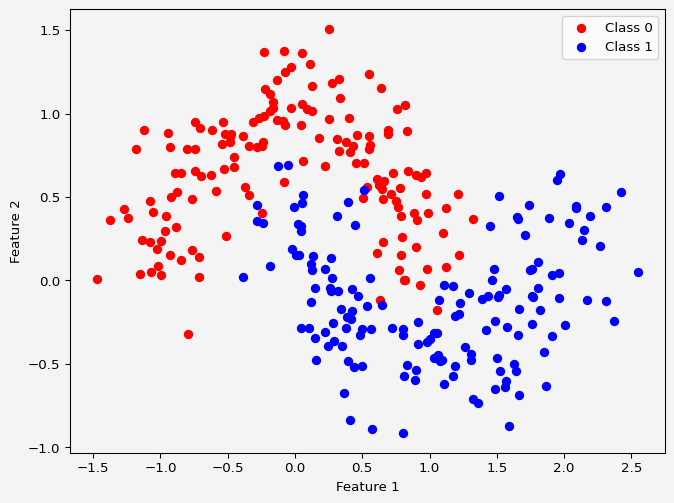

In [3]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, noise=0.2, random_state=42)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

There is now way that a linear hyperplane seperates the data. Therefore,
when the data is not linearly separable, SVMs use the **kernel trick**
to map the data into a higher-dimensional space where a linear
separation is possible. The idea is to map the original data points
$\mathbf{x}$ from the input space to a higher-dimensional feature space
using a \*feature transformation function $\phi(x)$.

For example,

$$
\phi: \mathbb{R}^n\mapsto \mathbb{R}^m, \hspace{4mm} \text{where } m>n
$$

In the higher-dimensional space, it’s often easier to find a hyperplane
that separates the two classes linearly.<br> <br> However, explicitly
calculating and working with this higher-dimensional transformation
$\phi(x)$ can be computationally expensive, especially when the
dimensionality $m$ is very high or infinite. This is where the **kernel
trick** comes in.

### The Kernel Trick

The **kernel trick** is a method that allows us to compute the inner
product between two transformed data points $\phi(x_i)$ and $\phi(x_j)$
in the higher-dimensional space **without** explicitly computing the
transformation $\phi(x)$.<br> <br> Instead of computing $\phi(x_i)$ and
$\phi(x_j)$ separately and then taking their inner product, we define a
**kernel function** $K(x_i, x_j)$ that directly computes this inner
product in the higher-dimensional space:

$$
K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

By substituting this kernel function into the SVM optimization problem,
we can work in the higher-dimensional space implicitly, without ever
explicitly mapping the data points to that space. This allows us to
handle complex, nonlinear decision boundaries with a more
computationally efficient approach.

#### Polynomial Kernel

The polynomial kernel allows us to model nonlinear decision boundaries
using polynomial functions. It is defined as:

$$
K(x_i, x_j) = (x_i^T x_j + c)^d
$$

where:

-   $c$ is a constant that controls the influence of higher-order terms.
-   $d$ is the degree of the polynomial.

The polynomial kernel creates a feature space that corresponds to all
monomials up to degree $d$. It can model interactions between features,
allowing the SVM to classify data with polynomial decision boundaries.

For example, when we have 1-D data and it is linearly inseperable, we
can use polynomial kernel with degree 2 or higher. Say $c=1/2$ and
$d=2$,

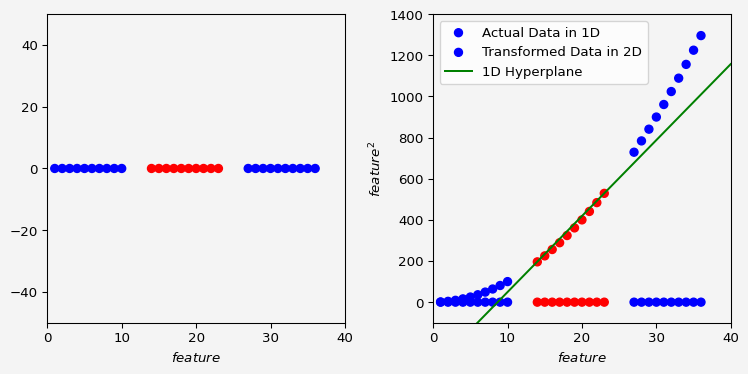

In [4]:
x1 = list(range(1,11))
x2 = list(range(14,24))
x3 = list(range(27,37))
x = [j for sub in [x1,x2,x3] for j in sub]
y = [0]*30
colors = ['blue']*10+['red']*10+ ['blue']*10
y_squared = [i**2 for i in x]
slope = (197-529.5)/(14-23)
line_x = np.linspace(0,40,100)
line_y = slope* (line_x - 14) + 197

fig = plt.figure(figsize=(7.9,4))
ax1 = fig.add_subplot(121)
ax1.scatter(x,y, c=colors, label='Actual Data in 1D')
ax1.set_xlabel(r'$feature$')
ax1.set_xlim(0,40)
ax1.set_ylim(-50,50)

ax2 = fig.add_subplot(122)
ax2.scatter(x,y, c=colors, label='Actual Data in 1D')
ax2.scatter(x,y_squared, c= colors, marker='o', label='Transformed Data in 2D')
ax2.plot(line_x,line_y, color='green',label='1D Hyperplane')
ax2.set_xlim(0,40)
ax2.set_ylim(-100,1400)
ax2.set_xlabel(r'$feature$')
ax2.set_ylabel(r'$feature^2$')
ax2.legend()

plt.tight_layout()
axes = [ax1,ax2]
for ax in axes:
    ax.set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

or for a 2D data to 3D transformation along with 2D hyperplane

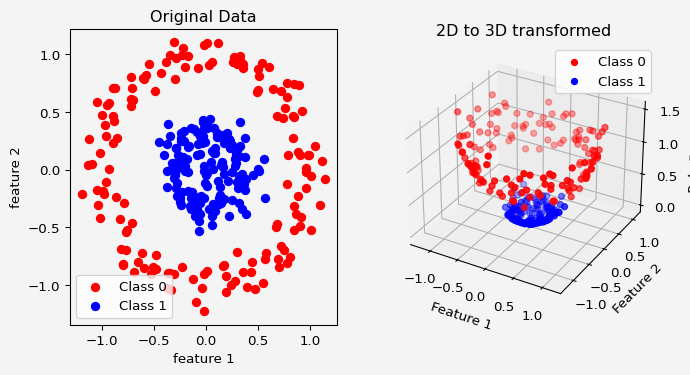

In [5]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# Generate a dataset that is not linearly separable
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Plot the original dataset
fig = plt.figure(figsize=(7.9, 4))
ax1 = fig.add_subplot(121)
ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
ax1.set_title('Original Data')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.legend()

# Apply polynomial kernel transformation
X_transformed = np.hstack((X, (X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1)))

# Plot the transformed dataset in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_transformed[y == 0][:, 0], X_transformed[y == 0][:, 1], X_transformed[y == 0][:, 2], color='red', label='Class 0')
ax2.scatter(X_transformed[y == 1][:, 0], X_transformed[y == 1][:, 1], X_transformed[y == 1][:, 2], color='blue', label='Class 1')
ax2.set_title('2D to 3D transformed')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Poly Feature')
ax2.legend()

axes = [ax1, ax2]
for ax in axes:
    ax.set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

#### Radial Basis Function (RBF) Kernel (Gaussian Kernel)

The RBF kernel, also known as the Gaussian kernel, is one of the most
popular kernels because it can map the data to an infinite-dimensional
space, allowing the model to capture highly complex relationships. It’s
defined as:

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

or equivalently:

$$
K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)
$$

where:

-   $\|x_i - x_j\|^2$ is the squared Euclidean distance between the
    points $x_i$ and $x_j$.
-   $\sigma$ (or $\gamma = \frac{1}{2\sigma^2}$) controls the width of
    the Gaussian function and, thus, the influence of each training
    example.

The RBF kernel is particularly effective when the relationship between
classes is highly nonlinear. It maps each data point to an
infinite-dimensional space, allowing the SVM to capture fine-grained
patterns.

#### Sigmoid Kernel

The sigmoid kernel is related to neural networks and is defined as:

$$
K(x_i, x_j) = \tanh(\kappa x_i^T x_j + \theta)
$$

where:

-   $\kappa$ and $\theta$ are parameters that control the shape of the
    kernel.

This kernel can be interpreted as simulating a neural network with a
single hidden layer, where $\tanh$ serves as the activation function.

### Dual Formulation with the Kernel Trick

In the dual form of the SVM optimization problem, we only require the
inner products $x_i^T x_j$ between data points. By replacing these inner
products with $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$, we obtain the dual
form of the optimization problem for a kernelized SVM:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

subject to:

$$
\alpha_i \geq 0 \quad \forall i, \quad \text{and} \quad \sum_{i=1}^n \alpha_i y_i = 0
$$

Using the kernel function $K(x_i, x_j)$, we can compute the decision
boundary in the original space without explicitly mapping to the
higher-dimensional space.

### Decision Function with the Kernel Trick

Once we solve for $\alpha$ and determine the support vectors, the
decision function for a new point $x$ becomes:

$$
f(x) = \sum_{i=1}^n \alpha_i y_i K(x_i, x) + b
$$

where:

-   $\alpha_i$ are the Lagrange multipliers found from the optimization.
-   $y_i$ are the labels of the support vectors.
-   $K(x_i, x)$ is the kernel function that calculates the inner product
    between the support vector $x_i$ and the new data point $x$.

This decision function allows us to classify new data points by
evaluating their relationship with the support vectors in the original
input space, using the kernel to measure similarity.

### Soft Margin SVM

The concept of **soft margin SVM** extends the hard margin SVM approach
to handle cases where data is not perfectly separable. In real-world
datasets, it’s often impossible to perfectly separate classes without
allowing some misclassification or overlap. Soft margin SVM addresses
this by introducing a **margin of tolerance**—it allows some data points
to lie within the margin or even on the wrong side of the decision
boundary.

In hard margin SVM, we strictly enforced that: $$
y_i (w^T x_i + b) \ge 1, \quad \forall i
$$

which means that each point is correctly classified and outside the
margin.

In soft margin SVM, we introduce **slack variables** $\xi_i$, which
allow some points to violate this constraint. The constraints become: $$
y_i (w^T x_i + b) \ge 1 - \xi_i, \quad \xi_i \ge 0
$$

where:

-   $\xi_i$ measures the degree of misclassification for each data point
    $x_i$.
-   If $\xi_i = 0$, then $x_i$ lies on or outside the margin (correct
    classification).
-   If $0 < \xi_i \le 1$, then $x_i$ lies within the margin but is still
    correctly classified.
-   If $\xi_i > 1$, then $x_i$ is misclassified.

To find the optimal hyperplane with a soft margin, we modify the
objective function to include a **penalty** for misclassifications. The
goal is to balance maximizing the margin and minimizing the
misclassification error. The objective function becomes:

$$
\min_{w, b, \xi} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
$$

where:

-   The term $\frac{1}{2} \|w\|^2$ encourages a large margin, just as in
    hard margin SVM.
-   The term $C \sum_{i=1}^n \xi_i$ penalizes misclassified points,
    where $C$ is a **regularization parameter** that controls the
    trade-off between maximizing the margin and minimizing the
    classification error.

The **parameter $C$**:

-   If $C$ is large, the optimization emphasizes minimizing
    misclassifications (more sensitive to individual data points), which
    leads to a narrower margin with fewer violations.
-   If $C$ is small, the optimization focuses more on maximizing the
    margin, allowing more misclassifications.

The optimization problem for soft margin SVM can be written as:

$$
\min_{w, b, \xi} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
$$ subject to: $$
y_i (w^T x_i + b) \ge 1 - \xi_i, \quad \xi_i \ge 0 \quad \forall i
$$

This problem is still convex and can be solved using Lagrange
multipliers, though it becomes slightly more complex due to the
introduction of slack variables $\xi_i$.

The dual form of the soft margin SVM, similar to the hard margin case,
can be derived using Lagrange multipliers. The dual problem becomes:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$ subject to: $$
0 \leq \alpha_i \leq C, \quad \sum_{i=1}^n \alpha_i y_i = 0
$$

The main difference here is that each $\alpha_i$ is now bounded by $C$
instead of being unrestricted, which introduces a balance between the
margin maximization and error tolerance.

In soft margin SVM, the margin is not strict. Some points are allowed to
lie within the margin or even be misclassified. Points that lie on the
wrong side of the margin are called **support vectors** with non-zero
slack values $\xi_i$.

-   **High $C$**: A larger $C$ results in a narrower margin with fewer
    violations, meaning fewer points within the margin or misclassified.
    This leads to a more complex model that might overfit if $C$ is too
    high.
-   **Low $C$**: A smaller $C$ results in a wider margin with more
    allowed violations, meaning more tolerance to misclassifications.
    This generally leads to a simpler, more robust model that might
    underfit if $C$ is too low.

The regularization parameter $C$ controls the trade-off between margin
width and classification accuracy. **Cross-validation** is commonly used
to select the optimal value of $C$ by evaluating the model’s performance
across different values of $C$ and choosing the one that generalizes
best to unseen data.

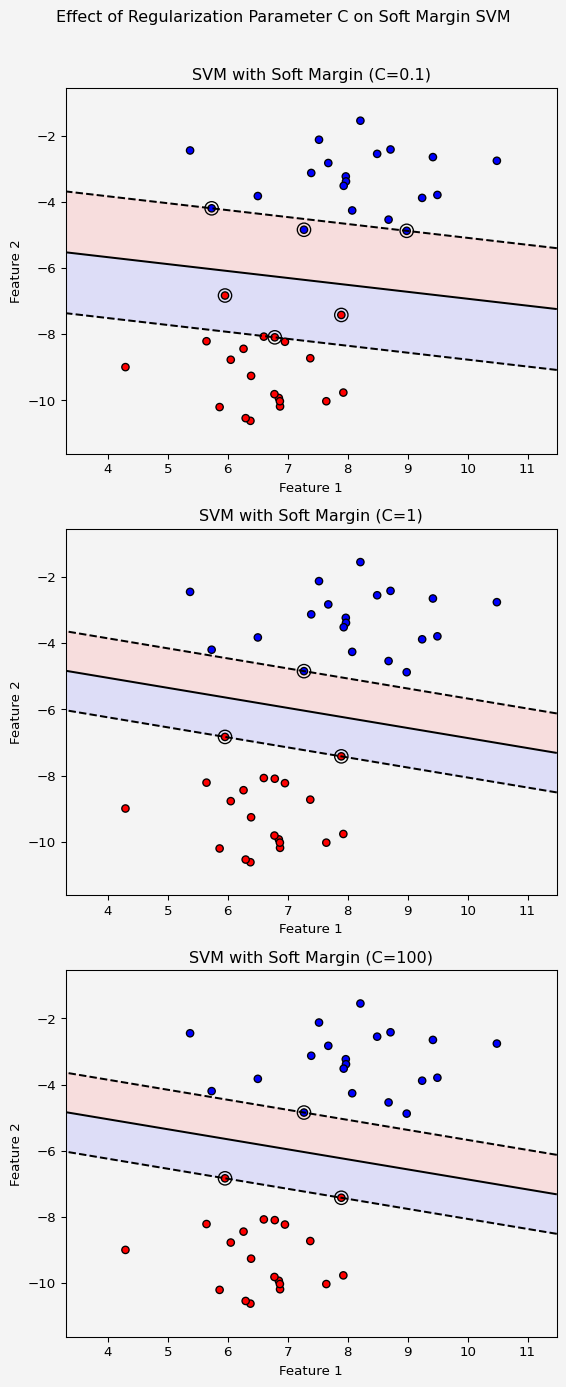

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # Transform labels to -1 and +1 for SVM

# Different values of C for comparison
C_values = [0.1, 1, 100]

# Plotting
plt.figure(figsize=(6, 15))  # Adjust figure size for vertical layout
plt.gcf().patch.set_facecolor('#f4f4f4')  # Set background color for the figure

for i, C in enumerate(C_values):
    # Fit SVM model with the given C value
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X, y)
    
    # Create a mesh to plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Plot decision boundary and margin
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = plt.subplot(len(C_values), 1, i + 1)  # Adjust to create vertical subplots
    ax.set_facecolor('#f4f4f4')  # Set background color for the plot area
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['#FFAAAA', '#AAAAFF', '#AAAAFF'], alpha=0.3)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=30, edgecolors='k')
    plt.title(f"SVM with Soft Margin (C={C})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    # Mark support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.suptitle("Effect of Regularization Parameter C on Soft Margin SVM", y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Python Implementation of SVM

### LinearSVC

Let’s first create the data

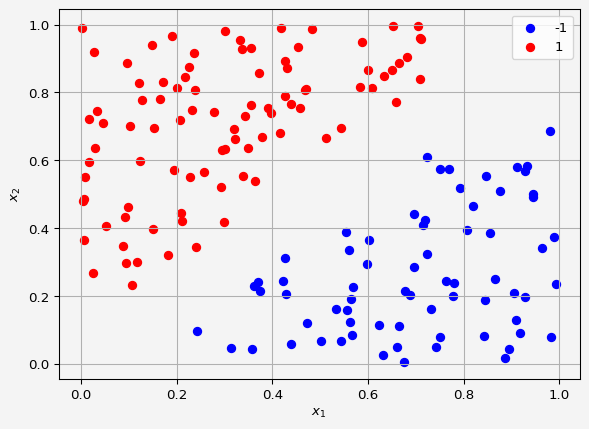

In [7]:
np.random.seed(123)
n_rows = 200
diff = 0.1
X1 = np.random.random((n_rows,2))
X_1 = X1[(X1[:,1]-X1[:,0])<= -diff,:]
X_2 = X1[(X1[:,1]-X1[:,0])>= diff,:]

X = np.append(X_1, X_2, axis=0)
y = np.empty(np.shape(X)[0])
y[(X[:,1]-X[:,0])<= -diff] = -1
y[(X[:,1]-X[:,0])>= diff] = 1
plt.scatter(X[y==-1,0], X[y==-1,1], c='blue', label=-1)
plt.scatter(X[y==1,0], X[y==1,1], c='red', label=1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Now we apply linear SVM classifier

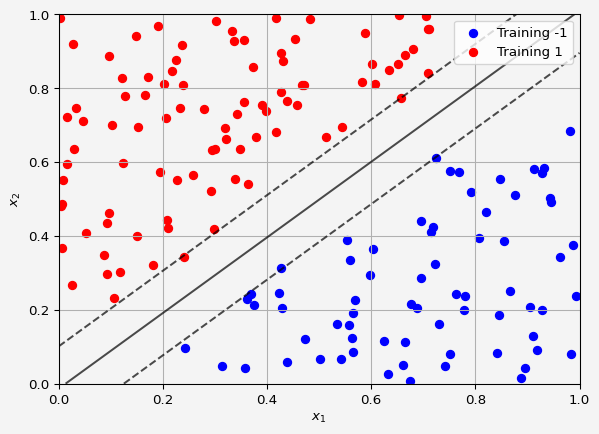

In [8]:
from sklearn.svm import LinearSVC

maximum_margin_SVC = LinearSVC(C= 1000, max_iter=10000, dual="auto")
maximum_margin_SVC.fit(X,y)
x1 = np.linspace(0,1,100)
x2 = np.linspace(0,1,100)

x1,x2 = np.meshgrid(x1,x2)
x1x2 = np.vstack([x1.ravel(),x2.ravel()]).T
z = maximum_margin_SVC.decision_function(x1x2).reshape(x1.shape)

plt.scatter(X[y==-1,0],X[y==-1,1], c='blue', label='Training -1')
plt.scatter(X[y==1,0],X[y==1,1], c='red', label='Training 1')
plt.contour(x1,x2,z, colors='k',levels=[-1,0,1], alpha=0.7, linestyles=['--','-','--'])
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

The data that we used to explain the polynomial kernels

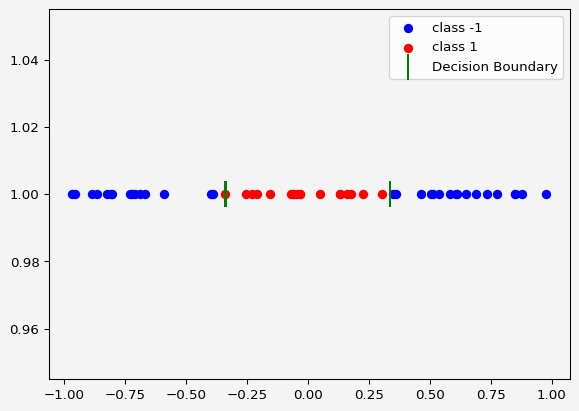

In [9]:
from sklearn.svm import SVC
X = 2*np.random.random(50)-1
y = np.ones(len(X))
y[(X>0.35) | (X<-0.35)] = -1

svc = SVC(kernel='poly', degree=2, C=1000)
svc.fit(X.reshape(-1,1),y)
plt.scatter(X[y==-1],np.ones(sum(y==-1)), c='blue',label='class -1')
plt.scatter(X[y==1],np.ones(sum(y==1)), c='red',label='class 1')
dcsns = svc.decision_function(np.linspace(-1,1,10000).reshape(-1,1)).round(1)
plt.scatter(
    np.linspace(-1,1,10000)[dcsns==0],
    np.ones(10000)[dcsns==0],
    marker='|',
    s= 400,
    c='green',
    label='Decision Boundary'
    )
plt.legend()
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

For the higher dimensions

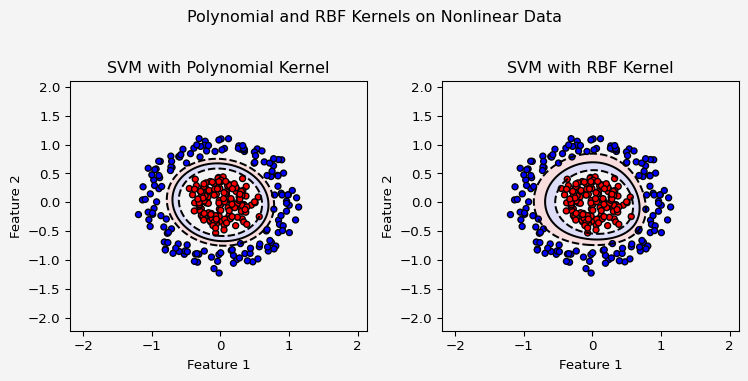

In [10]:
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Create SVM models with polynomial and RBF kernels
model_poly = svm.SVC(kernel='poly', degree=2, C=1000)
model_rbf = svm.SVC(kernel='rbf', gamma=1, C=1000)

# Fit the models
model_poly.fit(X, y)
model_rbf.fit(X, y)

# Create a mesh to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Plotting
plt.figure(figsize=(7.9, 4))

# Polynomial Kernel
plt.subplot(1, 2, 1)
Z_poly = model_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)
plt.contourf(xx, yy, Z_poly, levels=[-1, 0, 1], colors=['#FFAAAA', '#AAAAFF', '#AAAAFF'], alpha=0.3)
plt.contour(xx, yy, Z_poly, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=20, edgecolors='k')
plt.title("SVM with Polynomial Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.gca().set_facecolor('#f4f4f4')

# RBF Kernel
plt.subplot(1, 2, 2)
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], colors=['#FFAAAA', '#AAAAFF', '#AAAAFF'], alpha=0.3)
plt.contour(xx, yy, Z_rbf, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=20, edgecolors='k')
plt.title("SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.gca().set_facecolor('#f4f4f4')

plt.suptitle("Polynomial and RBF Kernels on Nonlinear Data")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

## References

### Books

-   Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*.
    Springer
-   Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of
    Statistical Learning: Data Mining, Inference, and Prediction*. 2nd
    Edition. Springer.  
-   Boyd, S., & Vandenberghe, L. (2004). *Convex Optimization*.
    Cambridge University Press.  
-   Schölkopf, B., & Smola, A. J. (2002). *Learning with Kernels:
    Support Vector Machines, Regularization, Optimization, and Beyond*.
    MIT Press.  
-   Murphy, K. P. (2012). *Machine Learning: A Probabilistic
    Perspective*. MIT Press.  
-   Vapnik, V. (1998). *Statistical Learning Theory*.
    Wiley-Interscience.

### Lecture Notes

-   Andrew Ng’s *Machine Learning* course on Coursera, particularly the
    lectures on Support Vector Machines, covering linear SVMs, geometric
    interpretation, and constraints.  
-   StatQuest with Josh Starmer
-   Data Science Bootcamp by *The Erdos Institute*

### Journals and Articles

-   Cortes, C., & Vapnik, V. (1995). “Support-vector networks.” *Machine
    Learning*, 20(3), 273-297.  
-   Aizerman, M. A., Braverman, E. M., & Rozonoer, L. I. (1964).
    “Theoretical foundations of the potential function method in pattern
    recognition learning.” *Automation and Remote Control*, 25, 821-837.

------------------------------------------------------------------------

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/svm/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/svm/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/svm/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**